In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import oskar
# scripts = oskar.Scripts()
import numpy as np
from tqdm import tqdm
import numpy
import matplotlib.pyplot as plot
import sys
import pickle as pkl
# import pyvisa as visa
import visa
import datetime
from scipy.optimize import curve_fit

from collections import defaultdict
from scipy.stats import kurtosis, skew
import pandas as pd
# import xarray as xr
from collections import OrderedDict
from pathlib import Path
import fnmatch
import time

Connect the GPIB - usb cable to electron PC, then run this script together with the artiq zotino_calibrator script

# Initializing

In [2]:
rm = visa.ResourceManager()
instruments = rm.list_resources()
instruments

(u'ASRL/dev/ttyS0::INSTR', u'USB0::2733::84::104542::0::INSTR')

In [3]:
# instruments
usb = list(filter(lambda x: 'USB' in x, instruments))
usb

[u'USB0::2733::84::104542::0::INSTR']

In [4]:
lan = list(filter(lambda x: 'ASRL' in x, instruments))
lan

[u'ASRL/dev/ttyS0::INSTR']

In [8]:

# if len(usb) != 1:
#     print('Bad instrument list', instruments)
#     sys.exit(-1)
keithley1 = rm.open_resource(usb[0])
#keithley2 = rm.open_resource(usb[1])
#keithley3 = rm.open_resource(lan[0])

ValueError: The device has no langid (permission issue, no string descriptors supported or device error)

In [6]:
instruments

(u'ASRL/dev/ttyS0::INSTR',
 u'USB0::1510::8448::1243106::0::INSTR',
 u'USB0::1510::8464::1408025::0::INSTR')

In [7]:
keithley1.write("*rst; status:preset; *cls")

(27, <StatusCode.success: 0>)

In [8]:
#keithley2.write("*rst; status:preset; *cls")

# Test command

In [9]:
#volt = float(keithley2.query('MEAS:VOLT:DC?'))
#volt

In [10]:
volt = float(keithley1.query('MEAS:VOLT:DC?'))
volt

1.30727848

In [17]:
#num data points
time_meas=20 #(72 hr)

#wait time 
wt_t=60*3 #(5min)

N=(time_meas*3600)/wt_t

print(N)

400


In [18]:
#PBC = np.zeros(N)
fiber_chamber = np.zeros(N)
for i in range(N):
    volt1 = float(keithley1.query('MEAS:VOLT:DC?'))
    #volt2 = float(keithley2.query('MEAS:VOLT:DC?'))
    fiber_chamber[i]=volt1
    #fiber[i]=volt2
    time.sleep(wt_t)

In [19]:
#print("list = ", PBC)
print("list = ", fiber_chamber)

('list = ', array([1.30615936, 1.305688  , 1.3053092 , 1.30410352, 1.30340696,
       1.30455864, 1.30376352, 1.30243528, 1.3021436 , 1.30177184,
       1.29942464, 1.29862704, 1.29551384, 1.29350888, 1.29219736,
       1.28949496, 1.28631688, 1.28373656, 1.2798432 , 1.27814472,
       1.27437672, 1.27067888, 1.26882728, 1.26708304, 1.26286592,
       1.25999256, 1.25545704, 1.25117064, 1.24738048, 1.24450472,
       1.24124208, 1.23755992, 1.23466888, 1.23022712, 1.22809232,
       1.2240876 , 1.22085848, 1.21827232, 1.21390056, 1.2106004 ,
       1.207922  , 1.20346752, 1.20075776, 1.1978512 , 1.20191256,
       1.20076248, 1.19958056, 1.19862272, 1.19696536, 1.19849792,
       1.19692848, 1.19883832, 1.1988196 , 1.19903632, 1.19812976,
       1.20054088, 1.20308576, 1.20287992, 1.2023984 , 1.20289048,
       1.20274296, 1.20154752, 1.20124256, 1.20247384, 1.20273152,
       1.20147504, 1.20177712, 1.20139488, 1.201274  , 1.20199896,
       1.20178392, 1.20335008, 1.20398256, 1.20230

(0, 1.4)

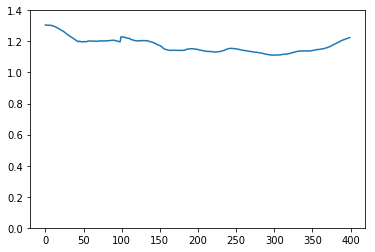

In [25]:
plt.plot(fiber_chamber)
plt.ylim([0,1.4])

In [21]:
#plt.plot(fiber)

In [22]:
#chamber powermeter reading 2.0 mW, range 2.2 mW 
# wavemeter powermeter reading 2.67uW 9.1uW

# Saving

In [23]:
np.savetxt('390Stability_wait_5min_fiber_chamber_4_01_24_temp_23.txt',fiber_chamber)
#np.savetxt('390Stability_wait_10min_PBC_3_29_24_temp_23p5.txt',PBC)